In [62]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


**Training Image Preprocessing**

In [63]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'data/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10993 files belonging to 6 classes.


**Validation Image Preprocessing**

In [64]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'data/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2788 files belonging to 6 classes.


In [65]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  ...

  [[  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   ...
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]
   [  0.         0.         0.      ]]

  [[  0.         0.         0.    

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import models, layers

In [67]:
train_ds = training_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [68]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=50

In [69]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),    # Sử dụng trực tiếp layers.Resizing
  layers.Rescaling(1./255),                   # Sử dụng trực tiếp layers.Rescaling
])

In [70]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),  # Sử dụng trực tiếp layers.RandomFlip
  layers.RandomRotation(0.2),                    # Sử dụng trực tiếp layers.RandomRotation
])

In [71]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

### Building Model

In [72]:
from tensorflow.keras.layers import Dense,MaxPool2D,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential

In [73]:
model = Sequential()

## Building Convolution Layer

In [74]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


c:\Users\HP\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [76]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [77]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [78]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [79]:
model.add(tf.keras.layers.Dropout(0.25))

In [80]:
model.add(tf.keras.layers.Flatten())

In [81]:
model.add(Dense(units=1500,activation='relu'))

In [82]:

model.add(Dense(units=6,activation='softmax'))

### Compiling Model

In [84]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_41 (Conv2D)          (None, 222, 222, 32)      9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                               

### Model Training

In [ ]:
# training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
344/344 [==============================] - 1556s 4s/step - loss: 0.9225 - accuracy: 0.6577 - val_loss: 0.6333 - val_accuracy: 0.7956
Epoch 2/20
344/344 [==============================] - 1495s 4s/step - loss: 0.4018 - accuracy: 0.8536 - val_loss: 0.5854 - val_accuracy: 0.8228
Epoch 3/20
344/344 [==============================] - 1487s 4s/step - loss: 0.2861 - accuracy: 0.9045 - val_loss: 0.2612 - val_accuracy: 0.9082
Epoch 4/20
344/344 [==============================] - 1476s 4s/step - loss: 0.2240 - accuracy: 0.9229 - val_loss: 0.1832 - val_accuracy: 0.9383
Epoch 5/20
344/344 [==============================] - 1477s 4s/step - loss: 0.1547 - accuracy: 0.9463 - val_loss: 0.2005 - val_accuracy: 0.9279
Epoch 6/20
344/344 [==============================] - 1499s 4s/step - loss: 0.1609 - accuracy: 0.9491 - val_loss: 0.2300 - val_accuracy: 0.9326
Epoch 7/20
344/344 [==============================] - 1497s 4s/step - loss: 0.1210 - accuracy: 0.9593 - val_loss: 0.1343 - val_accuracy:

### Model Evaluation

In [ ]:
train_loss, train_acc=model.evaluate(training_set)

344/344 [==============================] - 397s 1s/step - loss: 0.1664 - accuracy: 0.9456


In [ ]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

344/344 [==============================] - 357s 1s/step - loss: 0.1664 - accuracy: 0.9456
Training accuracy: 0.945601761341095
88/88 [==============================] - 87s 977ms/step - loss: 0.1651 - accuracy: 0.9509
Validation accuracy: 0.950860857963562


In [ ]:

#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)


88/88 [==============================] - 85s 966ms/step - loss: 0.1651 - accuracy: 0.9509
Validation accuracy: 0.950860857963562


### Saving Model

In [ ]:
model.save("trained_model.keras")
#lưu toàn bộ mô hình đã được huấn luyện vào một file để có thể tái sử dụng sau này mà không cần huấn luyện lại.

### Accuracy Visualization

In [ ]:

# epochs = [i for i in range(1,11)]
# plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
# plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
# plt.xlabel('No. of Epochs')
# plt.title('Visualization of Accuracy Result')
# plt.legend()
# plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

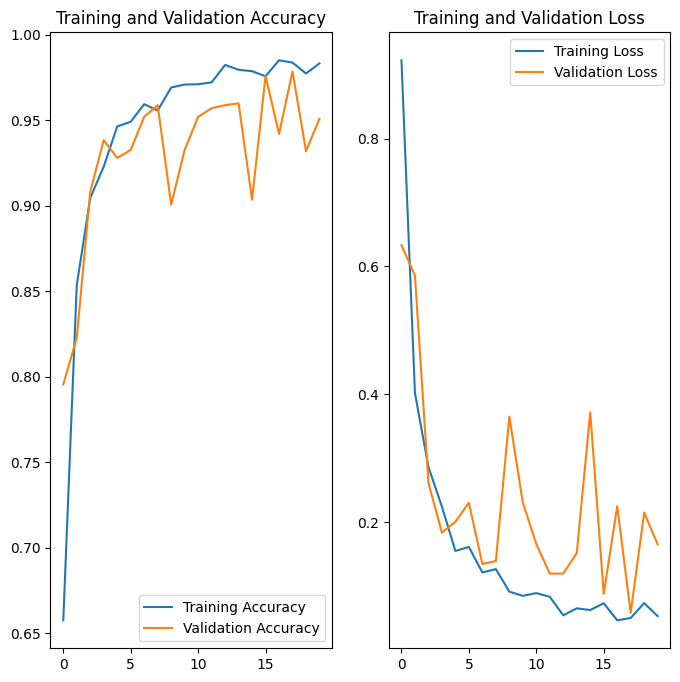

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'data/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2788 files belonging to 6 classes.


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

<tf.Tensor: shape=(2788,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
cm

array([[426,   4,  26,   3,   3,   1],
       [  0, 387,  56,   0,  27,   0],
       [  2,   0, 428,   0,   5,   1],
       [  1,   0,   1, 485,   3,   0],
       [  0,   0,   0,   0, 448,   0],
       [  2,   0,   1,   0,   1, 477]], dtype=int64)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                        precision    recall  f1-score   support

                  Tomato___Late_blight       0.99      0.92      0.95       463
                    Tomato___Leaf_Mold       0.99      0.82      0.90       470
           Tomato___Septoria_leaf_spot       0.84      0.98      0.90       436
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.99      0.99       490
          Tomato___Tomato_mosaic_virus       0.92      1.00      0.96       448
                      Tomato___healthy       1.00      0.99      0.99       481

                              accuracy                           0.95      2788
                             macro avg       0.95      0.95      0.95      2788
                          weighted avg       0.96      0.95      0.95      2788



### Save TFLITE

In [ ]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()

with open("model_unquant.tflite","wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpijs7yvyc\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpijs7yvyc\assets
